In [41]:
import Pkg; Pkg.add("Plots")
Pkg.add("Clp") 
Pkg.add("JuMP")
Pkg.add("PyPlot")
Pkg.add("Plots")
Pkg.add("Polyhedra")
Pkg.add("CDDLib")
Pkg.add("Ipopt")
Pkg.add("Gurobi")
Pkg.add("NLopt")
Pkg.add("CPLEX")

   Resolving package versions...
  No Changes to `C:\Users\caioc\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\caioc\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\caioc\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\caioc\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\caioc\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\caioc\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\caioc\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\caioc\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\caioc\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\caioc\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\caioc\.julia\environments\v1.10\Project.toml`
  No 

LoadError: Error building `CPLEX`: 
ERROR: LoadError: Unable to install CPLEX.jl.

The versions of CPLEX supported by CPLEX.jl are:

* 12.10
* 20.1
* 22.1 22.1.1

You must download and install one of these versions separately.

You should set the `CPLEX_STUDIO_BINARIES` environment variable to point to
the install location then try again. For example (updating the path to the
correct location):

```
ENV["CPLEX_STUDIO_BINARIES"] = "C:\\Program Files\\IBM\\ILOG\\CPLEX_Studio221\\cplex\\bin\\x64_win64\\"
import Pkg
Pkg.add("CPLEX")
Pkg.build("CPLEX")
```

See the CPLEX.jl README at https://github.com/jump-dev/CPLEX.jl for further
instructions.

Stacktrace:
 [1] error(s::String)
   @ Base .\error.jl:35
 [2] try_local_installation()
   @ Main C:\Users\caioc\.julia\packages\CPLEX\eQ4bU\deps\build.jl:140
 [3] top-level scope
   @ C:\Users\caioc\.julia\packages\CPLEX\eQ4bU\deps\build.jl:158
 [4] include(fname::String)
   @ Base.MainInclude .\client.jl:489
 [5] top-level scope
   @ none:5
in expression starting at C:\Users\caioc\.julia\packages\CPLEX\eQ4bU\deps\build.jl:151

In [86]:
using LinearAlgebra
using Plots

# M1. (Dark mode) Explique como a similaridade visual óbvia (para humanos) entre uma imagem regular (imagem = pixéis pretos, fundo = pixéis brancos) e a imagem "nightview" ou "dark mode" (letras = pixéis brancos, fundo = pixéis pretos) é refletida nos valores singulares das matrizes correspondentes às imagens? A pergunta é intencionalmente vaga e não há resposta única. Investigue, faça conjecturas e tente explicar suas observações.

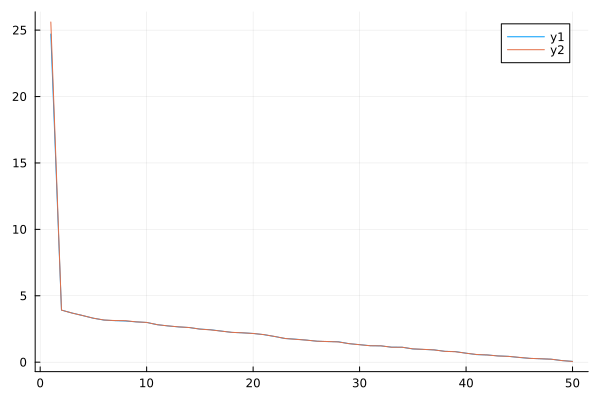

In [5]:
using LinearAlgebra, Plots
#Define dark and light matrices
F = rand(50,50)
G = rand(50,50)
D_F = ones(50,50)-F
D_G = ones(50,50)-G
# Perform SVD
H = svd(F)
H_D = svd(D_F)
V_F = H.S
V_D_F = H_D.S


plot(V_F);plot!(V_D_F)

A similaridade entre as imagens em light e dark mode se traduz nos valores singulares porque eles simbolizam a quantidade de informação em cada uma das matrizes de posto 1 que compoem a imagem original - como a imagem é praticamente a mesma, apenas as cores se invertem, grande parte da informação é exatamente igual.



# M2. (Compressão de imagens via SVD, posto baixo, etc.: Bandeiras dos países)[Exercício do livro "Linear Algebra for Everyone", Gilbert Strang, p. 269] Pesquise imagens das bandeiras nacionais de 20 países na Internet com padrões simples (p.ex. algumas listras/faixas, faixas diagonais, cruzes, e sem círculos, luas crescentes (imagens curvilíneas)). Discute o posto de cada bandeira (imagem grayscale), o posto, o posto aproximado e os valores singulares, relacionando suas conclusões com os padrões das bandeiras.



# Padrões simples geram bandeiras de posto baixo, visto que é possivel codificar a informação necessária para reconstruir a bandeira em uma decomposição adequada, especialmente ao compor a imagem como uma soma de matrizes de posto baixo. Proponho uma solução simplificada utilizando vetores de zeros e uns para codificar os padroes das bandeiras e vetores com possíveis "valores singulares" para codificar as cores com valores arbitrários (ex:2 ate 10) #
# Dos exemplos abaixo, vemos que as bandeiras representadas possuem posto 1 ou (n+1/2) (para a diagonal dupla) ou podem ser codificadas por um unico escalar multiplicando uma matriz identidade #

In [5]:
using LinearAlgebra

# bandeiras de listras verticais
C_v = [1; 1; 1]
R_v = [2 4 8] # mudar os valores de acordo com a codificação
display(C_v * R_v)

#bandeiras de listras horizontais - invertendo a ordem da multiplicação para a multiplicação correta
C_h = [1 1 1]
R_h = [2; 4; 8]
display(R_h * C_h)

#bandeiras diagonais - usando estruturas simples e um escalar
Id = Matrix(1I,3,3)
D = 4*Id
display(D)

#diagonal dupla - usando a estrutura CR novamente
C_dd = [1 0;
    0 1;
    1 0;]
R_dd = [ 7 0 7;
    0 7 0]
display(C_dd * R_dd)

#diagonais em dimensões maiores
#é necessário o uso da SVD
Diag = [6 6 0 0 0 0;
    6 6 6 0 0 0;
    0 6 6 6 0 0;
    0 0 6 6 6 0;
    0 0 0 6 6 6;
    0 0 0 0 6 6;]
U, S, V = svd(Diag)
A = zeros(size(Diag))
k = 5 #ajustar quantos valores singulares usar na aproximação
for i in 1:k
        A += S[i] * U[:, i] * V[:, i]'
end

println("Original Pattern Matrix:")
display(Diag)

# Ensure full display of matrices
println("Low-Rank Approximation (k=$k) with all columns shown:")
io = IOContext(stdout, :limit => false)
show(io, "text/plain", A)
display(S)

3×3 Matrix{Int64}:
 2  4  8
 2  4  8
 2  4  8

3×3 Matrix{Int64}:
 2  2  2
 4  4  4
 8  8  8

3×3 Matrix{Int64}:
 4  0  0
 0  4  0
 0  0  4

3×3 Matrix{Int64}:
 7  0  7
 0  7  0
 7  0  7

Original Pattern Matrix:


6×6 Matrix{Int64}:
 6  6  0  0  0  0
 6  6  6  0  0  0
 0  6  6  6  0  0
 0  0  6  6  6  0
 0  0  0  6  6  6
 0  0  0  0  6  6

Low-Rank Approximation (k=5) with all columns shown:
6×6 Matrix{Float64}:
  6.2588     5.67728    0.143625   0.143625  -0.322723   0.258804
  5.67728    6.40243    5.8209    -0.179098   0.402429  -0.322723
  0.143625   5.8209     6.07971    6.07971   -0.179098   0.143625
  0.143625  -0.179098   6.07971    6.07971    5.8209     0.143625
 -0.322723   0.402429  -0.179098   5.8209     6.40243    5.67728
  0.258804  -0.322723   0.143625   0.143625   5.67728    6.2588

6-element Vector{Float64}:
 16.811626414829025
 13.481877622304806
  8.670251207475774
  4.8116264148290275
  3.3297487925242253
  1.4818776223048005

#  M3. (Energia Dirichlet de um sinal e aplicação a grafos) Considere o vetor $x \in {\mathbb R}^T$ que representa uma série temporal ou sinal de duração finita $(T)$. A grandeza
## $$ D(x) = (x_1 - x_2)^2 + \cdots + (x_{T-1} - x_T)^2 ,$$
## que é a soma das diferenças entre termos adjacentes da série, é denominada energia Dirichlet do sinal (da série). Ela mede o comportamento oscilatório da série. Escreve $D(x)$ em notação vetorial. Quais sinais $x$ minimizam $D(x)$? Qual $x$ com $\|x\|_{\infty} \leq 1$ maximiza $D(x)$ e qual o valor de $D(x)$ que este sinal atinge? Considere um grafo cujos $n$ nós representam $n$ pessoas, e cujas arestas representam relações (de amizade, p.ex.) entre as pessoas correspondentes. Seja $v = (v_i) \in {\mathbb R}^n$, sendo $v_i$ é uma grandeza associada ao nó $i$ (pessoa $i$) [por exemplo, idade, nível educacional em anos, etc.] Seja $D(v)$ a energia Dirichlet associada com o grafo. Quando você estimaria que a energia $D(v)$ é grande/pequena? A pergunta é intencionalmente vaga e não há resposta certa. Investigue, faça conjecturas e tente explicar suas observações.

 A forma matricial pode ser representada como $x^tA^tAx$, onde $\vec{x} = [x1 \space x2 \space ... \space x_n]$ e $A = \begin{bmatrix} -1 & 1 & 0 & ... & 0 \\ 0 & -1 & 1 & 0 & ... 0 \end{bmatrix}, A \in {\mathcal R}^{(n-1) \times n}$ e $x$ tendo $n$ elementos 

Levando a: $$\begin{bmatrix}x1 & x2 & ... & xn\end{bmatrix} \begin{bmatrix} 1 & -1 & 0 & 0 &... \\ -1 & 2 & -1 & 0 &... \\ 0 & -1 & 2 & -1 & ... \\ ... & ...& ... & ... & ... \\ ... & 0 & 0 & -1 & 1 \end{bmatrix} \begin{bmatrix} x1 \\ x2 \\ ... \\ x_n \end{bmatrix}$$

In [125]:
using JuMP
using Ipopt

# Define the vector x and matrix S
x_initial = [0.5, -0.23, 0.89, -0.1]  # Example initial guess for x
S = [1.0 -1.0 0.0  0.0;
    -1.0  2.0 -1.0 0.0;
     0.0 -1.0  2.0 -1.0;
     0.0  0.0  -1.0  1.0]  # Example symmetric matrix S

# Define the dimension of the problem
n = length(x_initial)
epsilon = 1e-10

# Define the optimization model
model = Model(Ipopt.Optimizer)

# Define the decision variables
@variable(model, x[1:n])

# Set initial guess for each variable
for i in 1:n
    set_start_value(x[i], x_initial[i])
end

# Objective: Maximize x' * S * x
@objective(model, Max, sum(x[i] * S[i, j] * x[j] for i in 1:n, j in 1:n))

# Constraint: Infinity norm of x should be less than or equal to 1
@constraint(model, [i=1:n], x[i] <= 1)
@constraint(model, [i=1:n], x[i] >= -1)

# Additional constraint: The 1-norm of x must be greater than epsilon
@constraint(model, sum(abs(x[i]) for i in 1:n) >= epsilon)

# Set options (optional)
set_optimizer_attribute(model, "print_level", 5)  # Increase print level for more solver output

# Solve the optimization problem
optimize!(model)

# Retrieve and print the solution
x_opt = value.(x)
objective_value_opt = objective_value(model)

println("Optimal solution for x: ", x_opt)
println("Maximum value of x' * S * x: ", objective_value_opt)

# Display initial value for comparison
initial_value = x_initial' * S * x_initial
println("Initial value of x' * S * x: ", initial_value)


This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       12
Number of nonzeros in Lagrangian Hessian.............:       11

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        9
        inequality constraints with only lower bounds:        5
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        4

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.7674000e+00 0.00e+00 2.19e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

# O código acima foi utilizado para verificar o vetor que minimiza ou maximiza D(x). Os vetores da forma [a a a a] minimizam D(x) enquanto vetores do tipo [1 -1 1 -1] (respeitando a restrição de norma infinito menor que 1) maximizam D(x). O valor de D(v) será maior de acordo com a diversidade da população analisada - grupo com muitas similaridades geram vetores que se aproximam dos minimizadores de D(v) enquanto grupos com maiores variações dos parâmetros de pessoa para pessoa geram vetores que se aproxima dos maximizadores. Vale ressaltar que a ordenação dos elementos do grafo influencia na quantidade D(v), visto que ela mede as diferenças entre valores adjacentes. # 